 # Lab 2 – Basic Image Processing Techniques and Color Spaces
 

**Import the necessary libraries for Lab 2:**

In [34]:
%matplotlib inline 
import numpy as np
import cv2
import matplotlib.pylab as plt
from skimage import transform,io,color
from sklearn import cluster
from sklearn.utils import shuffle
import math

Load the image of your choise as **gray scale** image (replace lenna).

Image shape:(660, 900), Image data type:float64


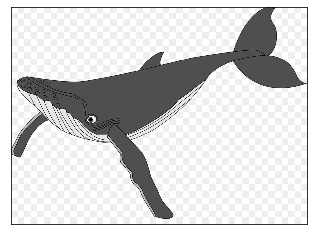

In [35]:
img = io.imread('whale2.jpg')
img=color.rgb2gray(img)
print ('Image shape:{}, Image data type:{}'.format(img.shape,img.dtype))
plt.imshow(img,cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X & Y axis
plt.show()

**Follow the instractions in each section:**

### Part 1 – Basic Image Processing Techniques
___

**Resizing (Scaling) and Rotation**

__Note__: In this experiment the same scaling factor is applied twice - in  vertical and in horizontal directions.  
* Resize your image by two scaling factors: **½ and 2**, using **nearest neighbor and bilinear** interpolation methods. Use _resize_ or _rescale_ from _skimage.transform_ library.  
    Observe the differences between the 2 interpolation methods and explain the results. 

Image shape:(330, 450), Image data type:float64
Image shape:(330, 450), Image data type:float64
Image shape:(1320, 1800), Image data type:float64
Image shape:(1320, 1800), Image data type:float64


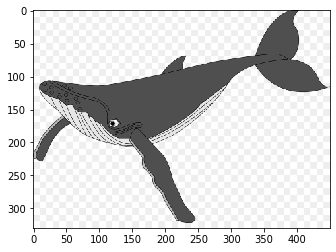

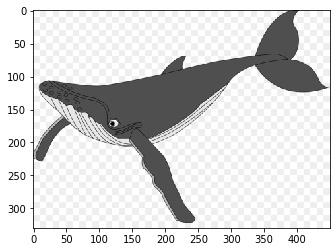

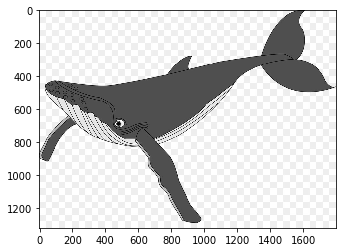

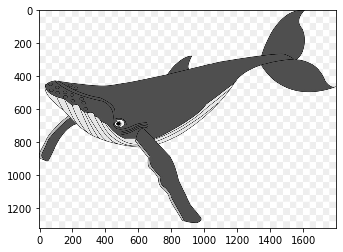

In [36]:
img_half=transform.rescale(img,0.5,order=0)
print ('Image shape:{}, Image data type:{}'.format(img_half.shape,img_half.dtype))

img_half_bi=transform.rescale(img,0.5,order=1)
print ('Image shape:{}, Image data type:{}'.format(img_half_bi.shape,img_half_bi.dtype))

img_double=transform.rescale(img,2,order=0)
print ('Image shape:{}, Image data type:{}'.format(img_double.shape,img_double.dtype))

img_double_bi=transform.rescale(img,2,order=1)
print ('Image shape:{}, Image data type:{}'.format(img_double_bi.shape,img_double_bi.dtype))

plt.imshow(img_half,cmap = 'gray')
plt.show()
plt.imshow(img_half_bi,cmap = 'gray')
plt.show()
plt.imshow(img_double,cmap = 'gray')
plt.show()
plt.imshow(img_double_bi,cmap = 'gray')
plt.show()

Nearest-Neighbor interpolation is not as smooth as billinear, the transitions are sharper, when we rescale the image with factor 2, the density of the lines (whale's chin) is bigger than the factor 1/2 image.

* Resize your image by scaling factor  **¼** using bilinear interpolation – **once with the default filter and once without a filter**.    
    In order to disable the default filter set the parameter 'anti_aliasing' to false.    
    Show the two output images.
    
    Explain the problem discussed in Part 1, Question 2 of the Preliminary Report: refer to both images (with and without the filter) to demonstrate the problem and its solution.

Image shape:(165, 225), Image data type:float64
Image shape:(165, 225), Image data type:float64


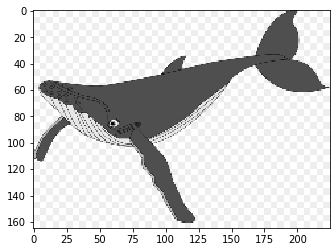

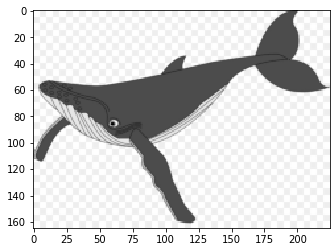

In [37]:
img_quarter=transform.rescale(img,0.25,order=1,anti_aliasing=False)
print ('Image shape:{}, Image data type:{}'.format(img_quarter.shape,img_quarter.dtype))

img_quarter_plus=transform.rescale(img,0.25,order=1,anti_aliasing=True)
print ('Image shape:{}, Image data type:{}'.format(img_quarter_plus.shape,img_quarter_plus.dtype))

plt.imshow(img_quarter,cmap = 'gray')
plt.show()
plt.imshow(img_quarter_plus,cmap = 'gray')
plt.show()

The problem is potential aliasing when down sampling an image, that results in information loss. As shown, without the anti_aliasing filter, the lines shaping the whale are not smooth, especially in the tail, unlike the original image and the filtered rescaled image ==> information loss. When using the filter, the image is smoother and similar to the original image (less information loss).

* Use the supplied functiom *resize_im(img, scale, order)* which shrinks and then expands the image by the same factor. Apply this program on the image of your choice with scaling factors of **2, 4, 8, 16, 32** and for each scaling factor calculate the Root Mean Square error (RMS) - the calculation given in the main pdf file.  
    Perform the same process for both interpolation methods - **nearest neighbor and bilinear**. Plot the RMS error vs. the scaling factor for both interpolation methods (on the same plot) and explain the plot. Attach several image examples that support your graph plot.

In [38]:
def resize_im(img, scale, method):
    m,n = img.shape
    img_shrink = transform.rescale(img, 1.0/scale , order=method)
    return transform.resize(img_shrink, (m,n), order=method)

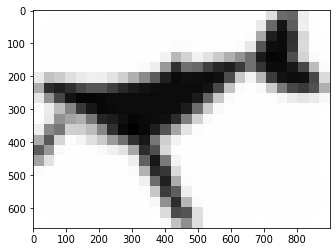

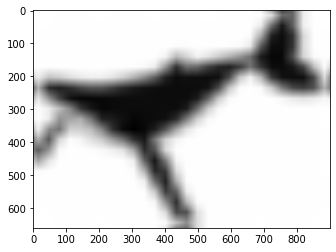

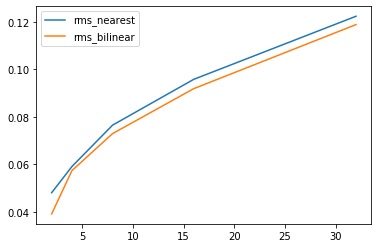

In [39]:
def rms_error(img1,img2):
    rms=0
    m,n = img1.shape
    for i in range (0,m):
        for j in range (0,n):
            rms=rms+math.pow(img1[i,j]-img2[i,j],2)
    rms=rms/(m*n)
    rms=math.sqrt(rms)
    return rms

res2=resize_im(img,2,0)
res2=rms_error(img,res2)
res2_bi=resize_im(img,2,1)
res2_bi=rms_error(img,res2_bi)

res4=resize_im(img,4,0)
res4=rms_error(img,res4)
res4_bi=resize_im(img,4,1)
res4_bi=rms_error(img,res4_bi)

res8=resize_im(img,8,0)
res8=rms_error(img,res8)
res8_bi=resize_im(img,8,1)
res8_bi=rms_error(img,res8_bi)

res16=resize_im(img,16,0)
res16=rms_error(img,res16)
res16_bi=resize_im(img,16,1)
res16_bi=rms_error(img,res16_bi)

res32=resize_im(img,32,0)
plt.imshow(res32,cmap = 'gray')
plt.show()
#plt.title('resize factor 32 nearest neighbor')
res32=rms_error(img,res32)
res32_bi=resize_im(img,32,1)
plt.imshow(res32_bi,cmap = 'gray')
plt.show()
#plt.title('resize factor 32 bilinear')
res32_bi=rms_error(img,res32_bi)

rms_0=np.array([res2,res4,res8,res16,res32])
scaling_factors=np.array([2,4,8,16,32])
rms_1=np.array([res2_bi,res4_bi,res8_bi,res16_bi,res32_bi])
plt.plot(scaling_factors,rms_0)
plt.ion()
plt.plot(scaling_factors,rms_1)
plt.legend(["rms_nearest","rms_bilinear"])



as can see the RMS is lower in billinear for all values. the intrerpolation method can reduce the RMS error. as shown the nearest neighbor is looking pixelised and the billinear picture look more like a whale. both the images are not focused because of the information loss happened in resized_im function. Also we note that the bigger the rescaling factor is the bigger the error (for both interpolation methods), this goes with the theory that the more you shrink an image the more information loss you have.

* Apply imrotate function to rotate the image of your choice by **30, 60 and -45 degrees** using **nearest neighbor and bilinear** interpolation methods. Observe the differences between the 2 interpolation methods.

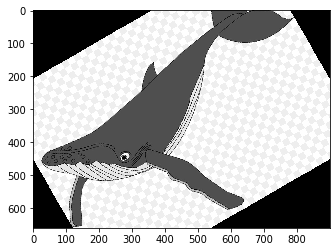

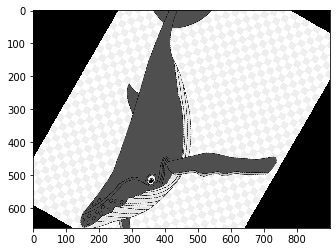

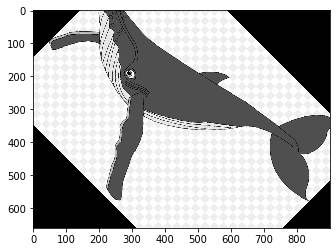

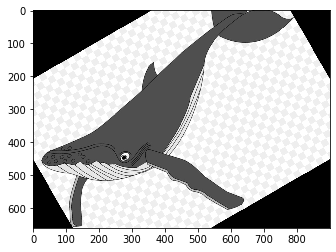

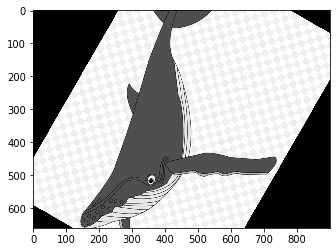

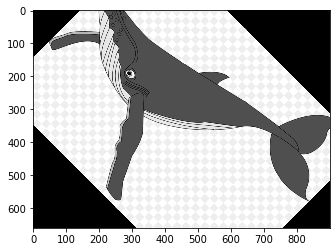

In [40]:
rot30=transform.rotate(img,30,order=0)
rot30_bi=transform.rotate(img,30,order=1)

rot60=transform.rotate(img,60,order=0)
rot60_bi=transform.rotate(img,60,order=1)

rot_neg_45=transform.rotate(img,-45,order=0)
rot_neg_45_bi=transform.rotate(img,-45,order=1)

plt.imshow(rot30,cmap = 'gray')
plt.show()
plt.imshow(rot60,cmap = 'gray')
plt.show()
plt.imshow(rot_neg_45,cmap = 'gray')
plt.show()

plt.imshow(rot30_bi,cmap = 'gray')
plt.show()
plt.imshow(rot60_bi,cmap = 'gray')
plt.show()
plt.imshow(rot_neg_45_bi,cmap = 'gray')
plt.show()

Nearest-Neighbor interpolation is not as smooth as billinear, the transitions are sharper, the rotation does not effect the interpoloation results.

### Part 2 – Color Space Conversion
___

1. Open an image of your choice and show the histograms and images for the R, G, B components. Use the supplied function *plot_RGB(img)*. Note, you should load a color image of your choise (use cv2.imread).

In [41]:
# Supplied function - 
def plot_RGB(img):
    plt.imshow(img)
    plt.title('Regular image')
    plt.show()

    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
    plt.figure(figsize=(20,15))
    plt.subplot(322)
    plt.imshow(b)
    plt.title("Blue")
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(324)
    plt.imshow(g)
    plt.title("Green")
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(326)
    plt.imshow(r)
    plt.title("Red")
    plt.subplots_adjust(hspace=0.5)

    color = ('b','g','r')
    titles = ("Blue","Green" ,"Red")
    #plt.figure(figsize=(10,8))
    for i,col in enumerate(color):
        histr = cv2.calcHist([img[:,:,i]],[0],None,[256],[0,256])
        plt.subplot(i*2+321)                             # 311 -> plot in the first cell
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        plt.subplots_adjust(hspace=.5)
        plt.title(str(titles[i]))

    plt.show()

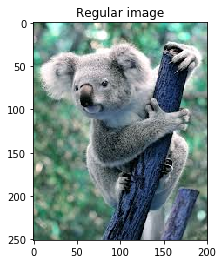

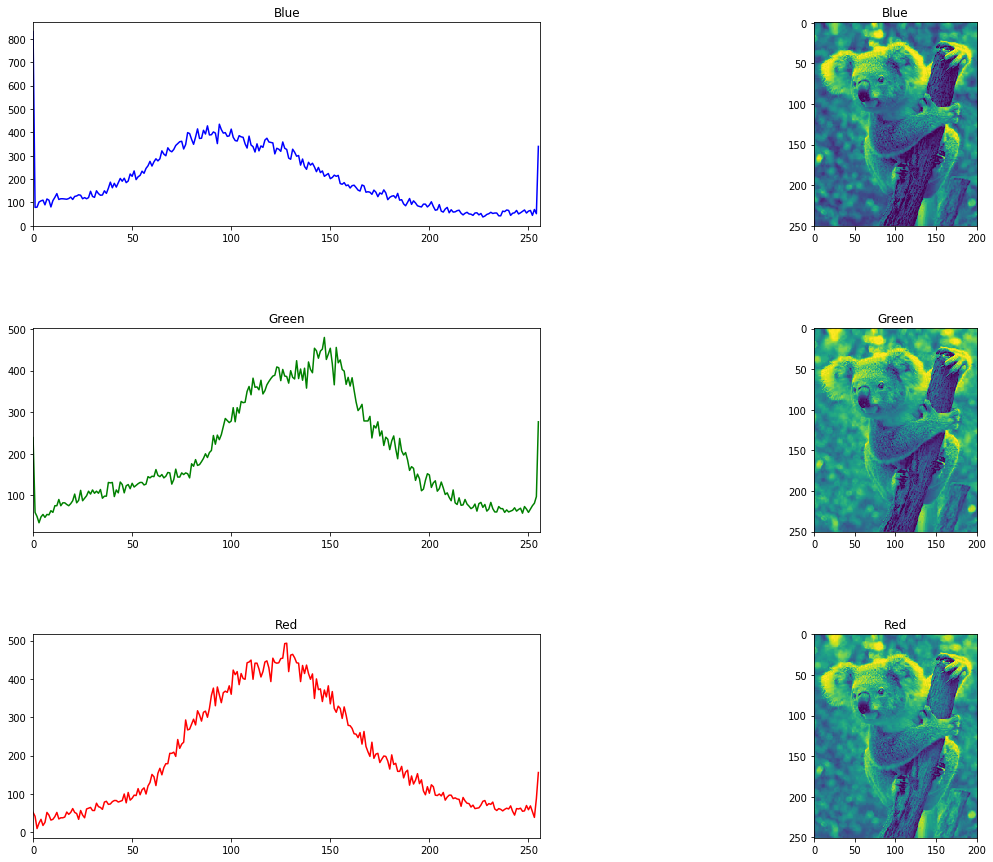

In [42]:
koala=cv2.imread('koala.png')
plot_RGB(koala)

Does the 'Regular image' looks as you accepted? if not please explain why. (Hint: what is the color space of the image that plt.imshow gets as input)  

Does not look like the original. cv2.imread reads a BGR image and koala.png is a RGB image. that is why when using plt.imshow the Blue and Red component switch places. plt functions in general refer to RGB images.

2.	Convert the image to the HSV color space (use cv2.cvtColor command), and show it with plt.imshow(HSV_image).

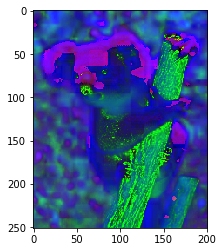

In [43]:
koala_hsv=cv2.cvtColor(koala,cv2.COLOR_BGR2HSV)
plt.imshow(koala_hsv)

3.	Show the images and the histograms of the 3 components in the HSV color space.

In [44]:
def plot_HSV(img):
    plt.imshow(img)
    plt.title('Regular image')
    plt.show()

    h, s, v = img[:,:,0], img[:,:,1], img[:,:,2]
    plt.figure(figsize=(20,15))
    plt.subplot(322)
    plt.imshow(h)
    plt.title("Hue")
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(324)
    plt.imshow(s)
    plt.title("Saturation")
    plt.subplots_adjust(hspace=0.5)
    plt.subplot(326)
    plt.imshow(v)
    plt.title("Value")
    plt.subplots_adjust(hspace=0.5)

    color = ('r','g','b')
    titles = ("Hue","Saturation" ,"Value")
    #plt.figure(figsize=(10,8))
    for i,col in enumerate(color):
        histr = cv2.calcHist([img[:,:,i]],[0],None,[256],[0,256])
        plt.subplot(i*2+321)                             # 311 -> plot in the first cell
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        plt.subplots_adjust(hspace=.5)
        plt.title(str(titles[i]))

    plt.show()

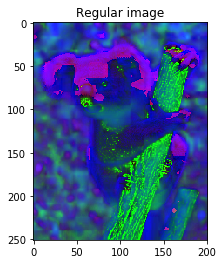

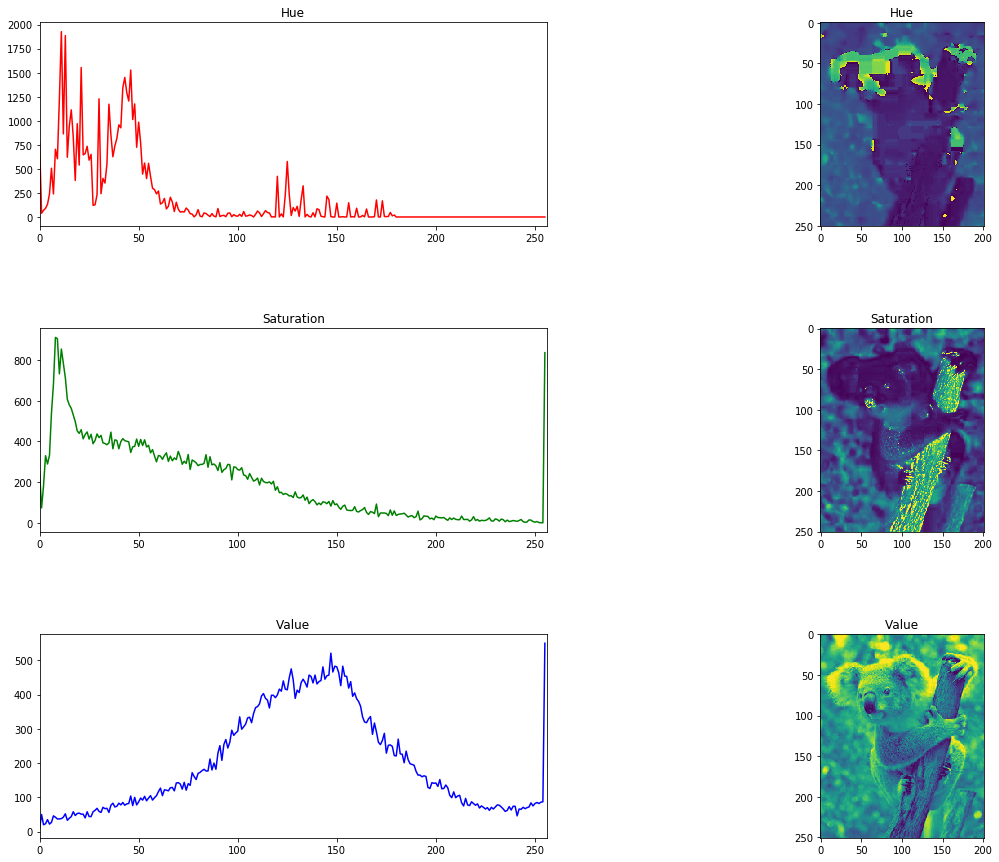

In [45]:
plot_HSV(koala_hsv)